# Exploratory Data Analysis on Global Billionaires in 2024

This project focuses on performing exploratory data analysis on global billionaires in the year 2024. The analysis aims to uncover patterns and insights related to net worth, age, gender, country of residence, and business sectors among the billionaires.

## Data Cleaning and Preparation

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/abhyu/Downloads/billionaires_2024.csv')
df.columns
df.head()
df.info()
df.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      2781 non-null   int64  
 1   month                     2781 non-null   int64  
 2   rank                      2781 non-null   int64  
 3   net_worth                 2781 non-null   object 
 4   last_name                 2781 non-null   object 
 5   first_name                2777 non-null   object 
 6   full_name                 2781 non-null   object 
 7   birth_date                2699 non-null   object 
 8   age                       2709 non-null   float64
 9   gender                    2781 non-null   object 
 10  country_of_citizenship    2781 non-null   object 
 11  country_of_residence      2747 non-null   object 
 12  city_of_residence         2718 non-null   object 
 13  business_category         2781 non-null   object 
 14  business

,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,business_industries,organization_name,position_in_organization,self_made,wealth_status
count,2781.0,2781.0,2781.000000,2781,2781,2777,2781,2699,2709.000000,2781,2781,2747,2718,2781,2781,332,355,2781,2510
unique,NaN,NaN,NaN,234,1886,1804,2780,2186,NaN,2,78,76,777,18,18,302,107,2,4
top,NaN,NaN,NaN,1.1 B,Li,John,Wang Yanqing & family,1962-01-01,NaN,Male,United States,United States,New York,Finance & Investments,['Finance & Investments'],Meta Platforms,Investor,True,Increased
freq,NaN,NaN,NaN,147,35,42,2,18,NaN,2412,813,834,109,427,427,4,46,1847,1480
mean,2024.0,4.0,1359.935994,NaN,NaN,NaN,NaN,NaN,65.688077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,780.213214,NaN,NaN,NaN,NaN,NaN,13.457678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2024.0,4.0,1.000000,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2024.0,4.0,686.000000,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2024.0,4.0,1380.000000,NaN,NaN,NaN,NaN,NaN,66.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2024.0,4.0,2046.000000,NaN,NaN,NaN,NaN,NaN,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Finding number and percentage of missing values

df.head()

missing_values = df.isnull().sum()
missing_percentage = missing_values / len(df) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 
                             'Percentage of Missing Values': missing_percentage})
print(missing_info)

                          Missing Values  Percentage of Missing Values
year                                   0                      0.000000
month                                  0                      0.000000
rank                                   0                      0.000000
net_worth                              0                      0.000000
last_name                              0                      0.000000
first_name                             4                      0.143833
full_name                              0                      0.000000
birth_date                            82                      2.948580
age                                   72                      2.588997
gender                                 0                      0.000000
country_of_citizenship                 0                      0.000000
country_of_residence                  34                      1.222582
city_of_residence                     63                      2.265372
busine

In [60]:
# Dropping columns with more than 50% missing values

threshold = 0.5
df.dropna(thresh = len(df) * threshold, axis = 1, inplace = True)

# Imputing numerical columns with mean

df['age'].fillna(df.age.mean(), inplace = True)

# Imputing categorical columns with mode

categorical_columns = ['first_name', 
                       'birth_date', 
                       'country_of_residence', 
                       'city_of_residence', 
                       'wealth_status']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace = True)

C:\Users\abhyu\AppData\Local\Temp\ipykernel_17160\1803236308.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df.age.mean(), inplace = True)
C:\Users\abhyu\AppData\Local\Temp\ipykernel_17160\1803236308.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2781 non-null   int64  
 1   month                   2781 non-null   int64  
 2   rank                    2781 non-null   int64  
 3   net_worth               2781 non-null   object 
 4   last_name               2781 non-null   object 
 5   first_name              2781 non-null   object 
 6   full_name               2781 non-null   object 
 7   birth_date              2781 non-null   object 
 8   age                     2781 non-null   float64
 9   gender                  2781 non-null   object 
 10  country_of_citizenship  2781 non-null   object 
 11  country_of_residence    2781 non-null   object 
 12  city_of_residence       2781 non-null   object 
 13  business_category       2781 non-null   object 
 14  business_industries     2781 non-null   

In [80]:
# Converting data types of columns

df.net_worth = df.net_worth.str.replace('$', '').str.replace(' B', '').astype(float)
df.birth_date = pd.to_datetime(df.birth_date)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   year                    2781 non-null   int64         
 1   month                   2781 non-null   int64         
 2   rank                    2781 non-null   int64         
 3   net_worth               2781 non-null   float64       
 4   last_name               2781 non-null   object        
 5   first_name              2781 non-null   object        
 6   full_name               2781 non-null   object        
 7   birth_date              2781 non-null   datetime64[ns]
 8   age                     2781 non-null   float64       
 9   gender                  2781 non-null   object        
 10  country_of_citizenship  2781 non-null   object        
 11  country_of_residence    2781 non-null   object        
 12  city_of_residence       2781 non-null   object  

## Distribution of Net Worth

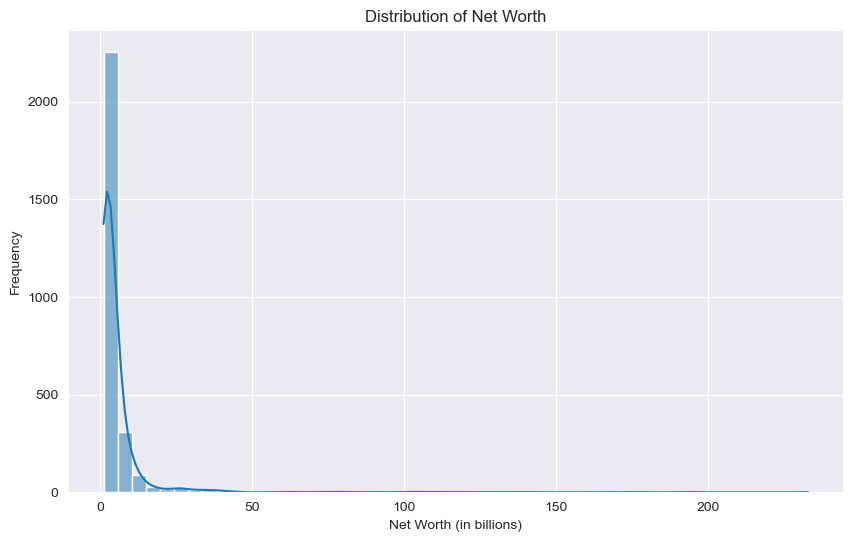

In [116]:
sns.set_style('darkgrid') 
plt.figure(figsize = (10, 6))
sns.histplot(df.net_worth, bins = 50, kde = True)
plt.title('Distribution of Net Worth')
plt.xlabel('Net Worth (in billions)')
plt.ylabel('Frequency')
plt.show()

## Age Distribution

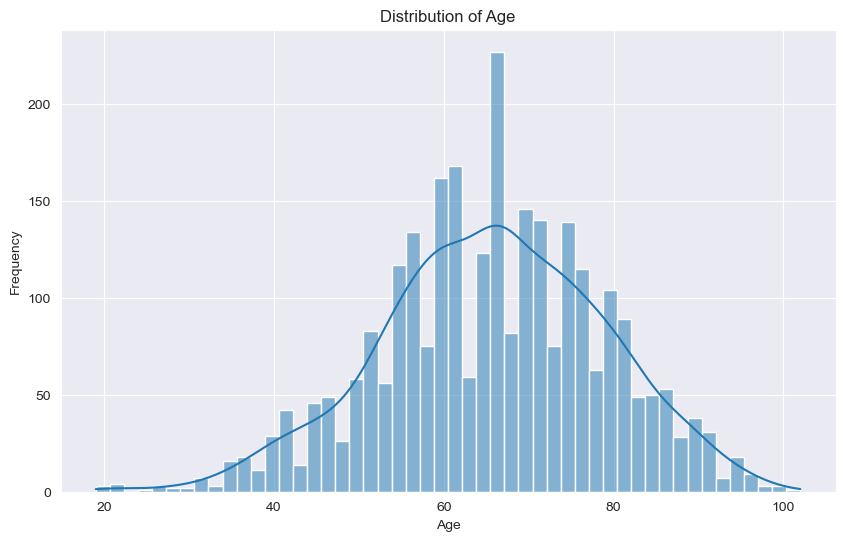

65.68807678110004
66.0


In [130]:
plt.figure(figsize = (10, 6))
sns.histplot(df.age, bins = 50, kde = True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

print(df.age.mean())
print(df.age.median())

## Gender Distribution

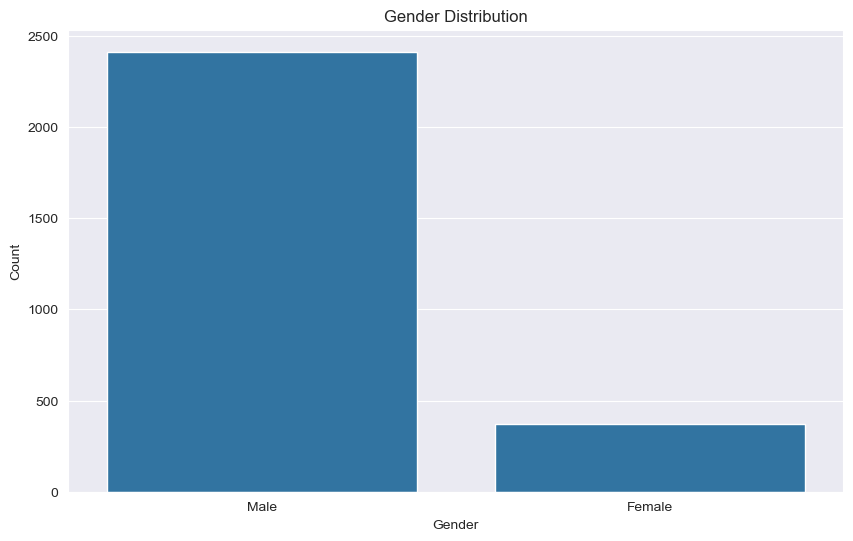

2412
369


In [144]:
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

print((df.gender == 'Male').sum())
print((df.gender == 'Female').sum())

## Top Countries by Number of Billionaires

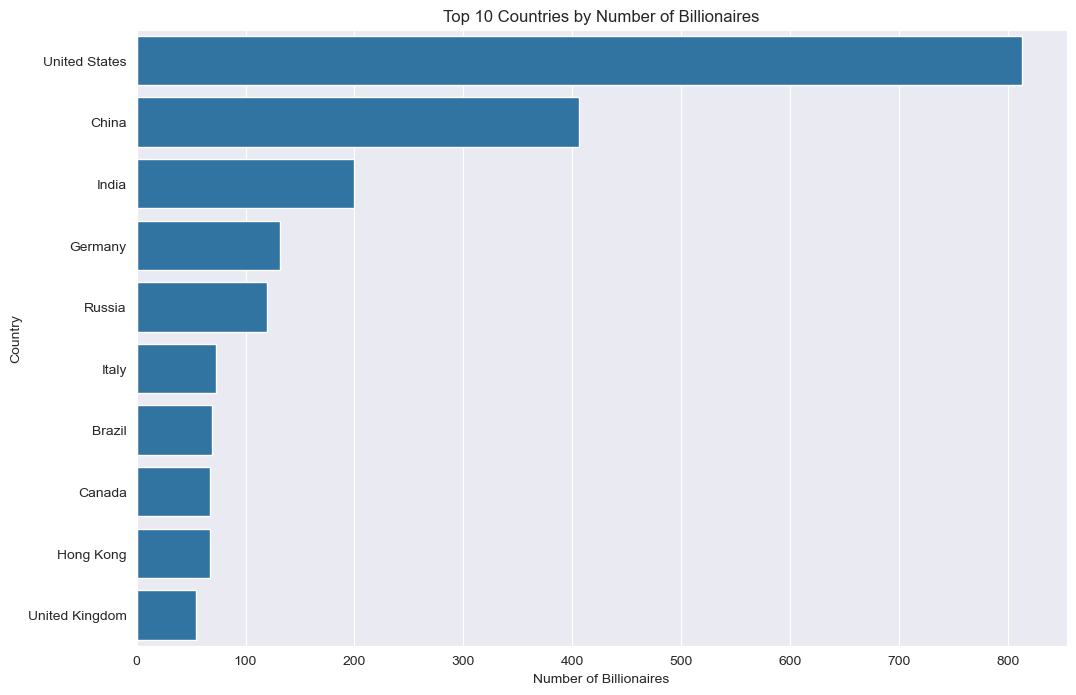

In [122]:
top_countries = df.country_of_citizenship.value_counts().head(10)
plt.figure(figsize = (12, 8))
sns.barplot(x = top_countries.values, y = top_countries.index)
plt.title('Top 10 Countries by Number of Billionaires')
plt.xlabel('Number of Billionaires')
plt.ylabel('Country')
plt.show()

## Top Business Categories

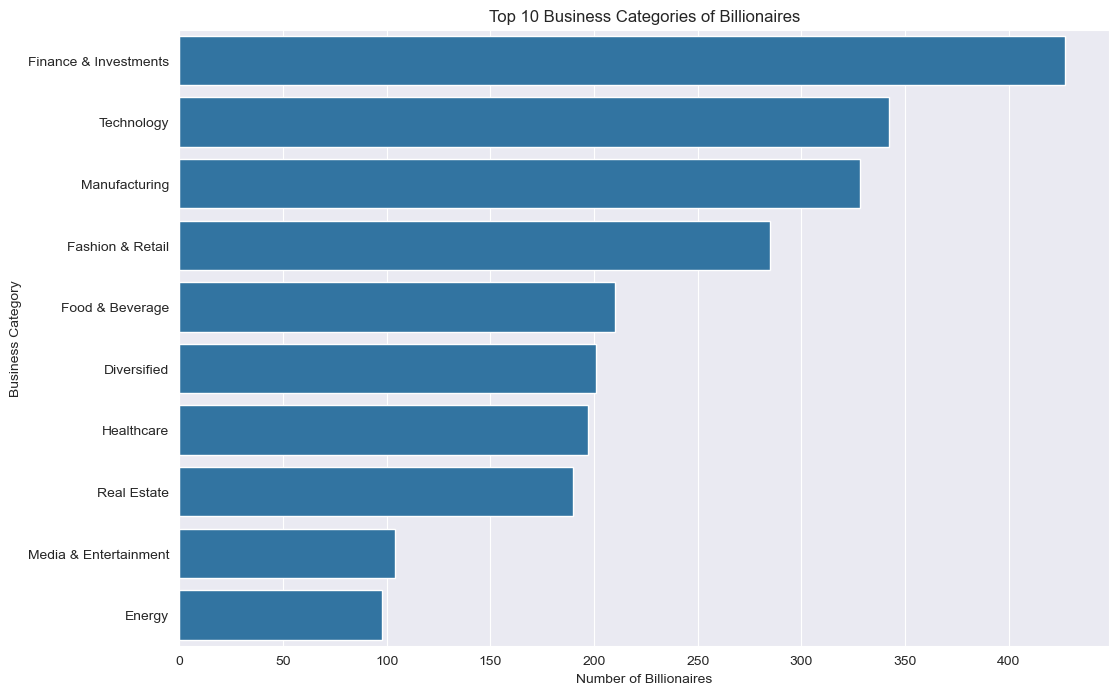

In [124]:
top_categories = df.business_category.value_counts().head(10)
plt.figure(figsize = (12, 8))
sns.barplot(x = top_categories.values, y = top_categories.index)
plt.title('Top 10 Business Categories of Billionaires')
plt.xlabel('Number of Billionaires')
plt.ylabel('Business Category')
plt.show()

## Insights
1. The distribution of net worth is right-skewed, which indicates that a very small number of billionaires have extremely high net worth.
2. The distribution of age appears to have a normal distribution with a median age of 66.
3. The number of male billionaires is about 6.5 times the number of female billionaires.
4. The United States has the most number of billionaires, followed by China and India.
5. The top 5 business categories for billionaires are Finance and Investments, Technology, Manufacturing, Fashion and Retail, and Food and Beverage.

In [148]:
# Saving the cleaned dataset

df.to_csv('cleaned_billionaires_2024.csv')